# EDA: Test predictions for S16

Exploratory data analysis for the 1D-CNN stress prediction results on **subject S16**.  
Data: window-level true labels vs predicted stress (0=non-stress, 1=stress).

In [ ]:
! pip install pandas numpy matplotlib seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use('ggplot')

# Try user path first, then fallbacks so notebook works in different environments
candidates = [
    '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/test_S16.csv',
    '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/test_S17.csv',
    os.path.join(os.getcwd(), 'test_S16.csv'),
    os.path.join(os.getcwd(), 'test_S17.csv'),
    os.path.join(os.path.dirname(os.getcwd()), 'test_S16.csv'),
    os.path.join(os.path.dirname(os.getcwd()), 'test_S17.csv'),
]
DATA_PATH = None
for p in candidates:
    if os.path.exists(p):
        DATA_PATH = p
        break
if DATA_PATH is None:
    raise FileNotFoundError(
        'CSV not found. Put eda-test_S16.csv or test_S17.csv in '
        '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/ or in the current directory.'
    )
print(f"Using: {DATA_PATH}")

Using: /Users/mostafazamaniturk/Documents/USD/AAI-530/work/test_S16.csv


## 1. Load data & basic info

In [7]:
df = pd.read_csv(DATA_PATH)
df.head(10)

,subject,time_sec,bvp,eda,label,predicted_label,predicted_label_name
0,S16,0.000000,-1.60,0.254602,-1,-1,no_window
1,S16,0.015625,-2.09,0.254522,-1,-1,no_window
2,S16,0.031250,-2.72,0.254442,-1,-1,no_window
3,S16,0.046875,-3.31,0.254362,-1,-1,no_window
4,S16,0.062500,-3.74,0.254282,-1,-1,no_window
5,S16,0.078125,-3.99,0.254202,-1,-1,no_window
6,S16,0.093750,-4.18,0.254122,-1,-1,no_window
7,S16,0.109375,-4.44,0.254042,-1,-1,no_window
8,S16,0.125000,-4.88,0.253962,-1,-1,no_window
9,S16,0.140625,-5.51,0.253882,-1,-1,no_window


In [8]:
df.tail(10)

,subject,time_sec,bvp,eda,label,predicted_label,predicted_label_name
360374,S16,5630.843750,-45.48,0.412235,-1,-1,no_window
360375,S16,5630.859375,-28.48,0.412235,-1,-1,no_window
360376,S16,5630.875000,-8.41,0.412235,-1,-1,no_window
360377,S16,5630.890625,14.38,0.412235,-1,-1,no_window
360378,S16,5630.906250,38.97,0.412235,-1,-1,no_window
360379,S16,5630.921875,63.00,0.412235,-1,-1,no_window
360380,S16,5630.937500,82.79,0.412235,-1,-1,no_window
360381,S16,5630.953125,94.31,0.412235,-1,-1,no_window
360382,S16,5630.968750,94.96,0.412235,-1,-1,no_window
360383,S16,5630.984375,84.97,0.412235,-1,-1,no_window


In [9]:
print('Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nData types:')
print(df.dtypes)
df.info()

Shape: (360384, 7)

Columns: ['subject', 'time_sec', 'bvp', 'eda', 'label', 'predicted_label', 'predicted_label_name']

Data types:
subject                  object
time_sec                float64
bvp                     float64
eda                     float64
label                     int64
predicted_label           int64
predicted_label_name     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360384 entries, 0 to 360383
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject               360384 non-null  object 
 1   time_sec              360384 non-null  float64
 2   bvp                   360384 non-null  float64
 3   eda                   360384 non-null  float64
 4   label                 360384 non-null  int64  
 5   predicted_label       360384 non-null  int64  
 6   predicted_label_name  360384 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage

In [10]:
df.describe()

,time_sec,bvp,eda,label,predicted_label
count,360384.000000,360384.000000,360384.000000,360384.000000,360384.000000
mean,2815.492188,0.001081,0.716154,-0.336161,-0.448599
std,1625.531938,29.801251,0.571158,0.935223,0.713028
min,0.000000,-471.510000,0.243087,-1.000000,-1.000000
25%,1407.746094,-8.600000,0.387660,-1.000000,-1.000000
50%,2815.492188,1.410000,0.461652,-1.000000,-1.000000
75%,4223.238281,9.300000,0.815156,0.000000,0.000000
max,5630.984375,519.630000,2.656158,2.000000,1.000000


## 2. Label distribution & missing values

In [11]:
# True and predicted label counts
print('True label distribution:')
print(df['label'].value_counts().sort_index())
if 'predicted_label' in df.columns:
    print('\nPredicted label distribution:')
    print(df['predicted_label'].value_counts())
print('\nMissing values:')
print(df.isnull().sum())

True label distribution:
label
-1    214423
 0     76801
 1     45044
 2     24116
Name: count, dtype: int64

Predicted label distribution:
predicted_label
-1    208707
 0    104638
 1     47039
Name: count, dtype: int64

Missing values:
subject                 0
time_sec                0
bvp                     0
eda                     0
label                   0
predicted_label         0
predicted_label_name    0
dtype: int64


## 3. Metrics: accuracy, confusion matrix (TP, TN, FP, FN)

In [12]:
# Derived columns: correct prediction, outcome
df['correct'] = (df['label'] == df['predicted_label']).astype(int)
df['outcome'] = df['correct'].map({1: 'Correct', 0: 'Incorrect'})

# Overall metrics
n_total = len(df)
n_correct = df['correct'].sum()
overall_accuracy = n_correct / n_total if n_total else 0
print('=== Overall metrics ===')
print(f'Total windows: {n_total}')
print(f'Correct predictions: {n_correct}')
print(f'Overall accuracy: {overall_accuracy:.2%}')

# Confusion matrix counts (label: 0=non-stress, 1=stress; -1=no_window excluded from TP/TN/FP/FN if needed)
tp = ((df['label'] == 1) & (df['predicted_label'] == 1)).sum()
tn = ((df['label'] == 0) & (df['predicted_label'] == 0)).sum()
fp = ((df['label'] == 0) & (df['predicted_label'] == 1)).sum()
fn = ((df['label'] == 1) & (df['predicted_label'] == 0)).sum()
print('\n=== Confusion matrix (TP, TN, FP, FN) ===')
print(f'  TP (True Positive):  {tp:4d}  (correctly predicted stress)')
print(f'  TN (True Negative):  {tn:4d}  (correctly predicted non-stress)')
print(f'  FP (False Positive): {fp:4d}  (predicted stress, actually non-stress)')
print(f'  FN (False Negative): {fn:4d}  (predicted non-stress, actually stress)')
print(f'\n  Layout:  TP={tp} | FP={fp}')
print(f'           FN={fn} | TN={tn}')

=== Overall metrics ===
Total windows: 360384
Correct predictions: 330552
Overall accuracy: 91.72%

=== Confusion matrix (TP, TN, FP, FN) ===
  TP (True Positive):  45044  (correctly predicted stress)
  TN (True Negative):  76801  (correctly predicted non-stress)
  FP (False Positive):    0  (predicted stress, actually non-stress)
  FN (False Negative):    0  (predicted non-stress, actually stress)

  Layout:  TP=45044 | FP=0
           FN=0 | TN=76801


## 4. Visualizations

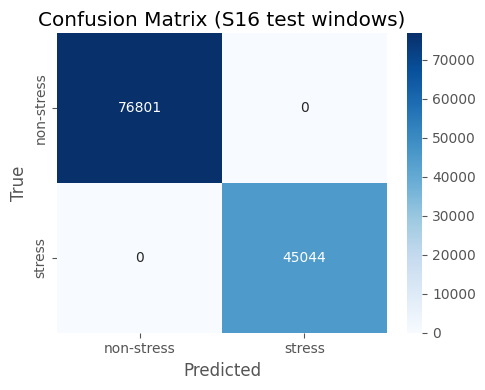

In [13]:
# Confusion matrix heatmap
from sklearn.metrics import confusion_matrix as sk_cm
cm = sk_cm(df['label'], df['predicted_label'], labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['non-stress', 'stress'],
            yticklabels=['non-stress', 'stress'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix (S16 test windows)')
plt.tight_layout()
plt.show()

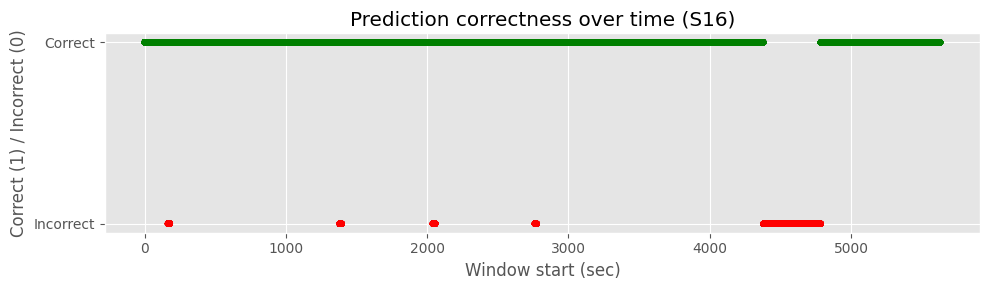

In [14]:
# Correct vs incorrect by time (time_sec)
fig, ax = plt.subplots(figsize=(10, 3))
ax.scatter(df['time_sec'], df['correct'], alpha=0.6, c=df['correct'].map({1: 'green', 0: 'red'}), s=15)
ax.set_xlabel('Window start (sec)')
ax.set_ylabel('Correct (1) / Incorrect (0)')
ax.set_title('Prediction correctness over time (S16)')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Incorrect', 'Correct'])
plt.tight_layout()
plt.show()

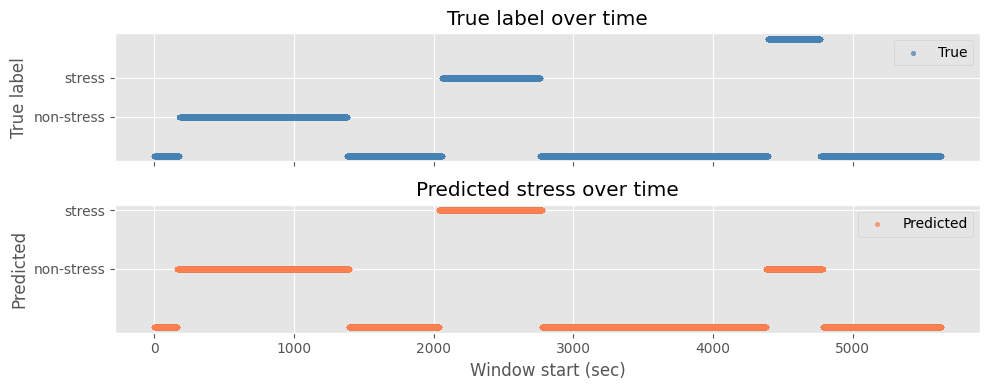

In [15]:
# True vs predicted stress over time
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
axes[0].scatter(df['time_sec'], df['label'], alpha=0.7, s=10, c='steelblue', label='True')
axes[0].set_ylabel('True label')
axes[0].set_title('True label over time')
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['non-stress', 'stress'])
axes[0].legend(loc='upper right')
axes[1].scatter(df['time_sec'], df['predicted_label'], alpha=0.7, s=10, c='coral', label='Predicted')
axes[1].set_xlabel('Window start (sec)')
axes[1].set_ylabel('Predicted')
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['non-stress', 'stress'])
axes[1].legend(loc='upper right')
axes[1].set_title('Predicted stress over time')
plt.tight_layout()
plt.show()

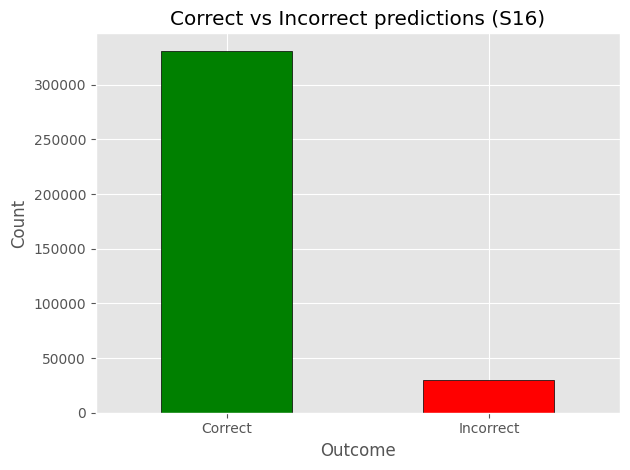

In [16]:
# Outcome bar chart (Correct vs Incorrect)
df['outcome'].value_counts().plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Correct vs Incorrect predictions (S16)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# ==========================================
# Tableau dashboard datasets — S16 only
# ==========================================
df_s16 = df[df['subject'] == 'S16'].copy()
print(f'S16 rows: {len(df_s16)}')

OUTPUT_DIR = os.path.join(os.path.dirname(os.path.abspath(DATA_PATH)), 'tableau_export') if DATA_PATH else 'tableau_export'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Human-readable label names for Tableau
df_s16['true_label_name'] = df_s16['label'].map({-1: 'no_window', 0: 'non-stress', 1: 'stress', 2: 'amusement'})

# 1. Main dataset for Tableau (S16 only)
df_s16.to_csv(os.path.join(OUTPUT_DIR, 'stress_predictions_with_eda.csv'), index=False)
print('Saved: stress_predictions_with_eda.csv (S16)')

# 2. Per-subject summary (S16 only)
summary_by_subject = df_s16.groupby('subject').agg(n_windows=('correct', 'count'), n_correct=('correct', 'sum')).reset_index()
summary_by_subject['accuracy'] = (summary_by_subject['n_correct'] / summary_by_subject['n_windows']).round(4)
summary_by_subject['n_incorrect'] = summary_by_subject['n_windows'] - summary_by_subject['n_correct']
summary_by_subject.to_csv(os.path.join(OUTPUT_DIR, 'summary_by_subject.csv'), index=False)
print('Saved: summary_by_subject.csv (S16)')

# 3. Confusion matrix long (valid labels 0,1 only)
df_valid = df_s16[df_s16['label'].isin([0, 1]) & df_s16['predicted_label'].isin([0, 1])]
confusion_long = df_valid.groupby(['label', 'predicted_label', 'predicted_label_name']).size().reset_index(name='count')
confusion_long['true_label_name'] = confusion_long['label'].map({0: 'non-stress', 1: 'stress'})
confusion_long.to_csv(os.path.join(OUTPUT_DIR, 'confusion_matrix_long.csv'), index=False)
print('Saved: confusion_matrix_long.csv (S16)')

# 4. Overall metrics (one row for KPI cards, S16 only)
tp = ((df_s16['label'] == 1) & (df_s16['predicted_label'] == 1)).sum()
tn = ((df_s16['label'] == 0) & (df_s16['predicted_label'] == 0)).sum()
fp = ((df_s16['label'] == 0) & (df_s16['predicted_label'] == 1)).sum()
fn = ((df_s16['label'] == 1) & (df_s16['predicted_label'] == 0)).sum()
n_total, n_correct = len(df_s16), df_s16['correct'].sum()
overall_metrics = pd.DataFrame([{'n_total': n_total, 'n_correct': int(n_correct), 'overall_accuracy': n_correct / n_total if n_total else 0, 'TP': int(tp), 'TN': int(tn), 'FP': int(fp), 'FN': int(fn)}])
overall_metrics.to_csv(os.path.join(OUTPUT_DIR, 'overall_metrics.csv'), index=False)
print('Saved: overall_metrics.csv (S16)')
print(f'\nTableau export folder: {os.path.abspath(OUTPUT_DIR)}')


Saved: stress_predictions_with_eda.csv
Saved: summary_by_subject.csv
Saved: confusion_matrix_long.csv
Saved: overall_metrics.csv

Tableau export folder: /Users/mostafazamaniturk/Documents/USD/AAI-530/work/tableau_export
